Veri bilimine merak salan hemen hemen herkes bir noktada metin işlemeye bulaşır. Kitapların incelenmesinden tutun da, sosyal medyada yazılanları derlemeye kadar pek çok çalışma özünde cümleler ve kelimelerle boğuşmayı gerektirir. Pek eğlencelidir; ben de bayılırım. Hatta birkaç ay önce bir paragrafın hangi yazara ait olduğunu bulmakla ilgili bir [yazı](Birbil_2017.pdf) hazırladım.

Bu yazıda İnsan Hakları Evrensel Beyannamesi'ni örnek metin olarak ele alacağım. Bir yandan basit metin işleme adımlarını yaparken, bir yandan da iki noktayı size göstermek istiyorum:

1. İnternet'teki açık kaynak kodlu bir Python paketinin _yüklenmeden_ kullanılması.
2. Yeni bir paketin <span style="font-family:Courier">pip</span> komutu ile kurulması.

Önce dosyayı okuyup bir değişkene atalım. Bu değişkenin tipi, karakter dizisi (string) sınıfından (class <span style="color:darkgreen; font-family:Courier">str</span>) olacak.

In [1]:
with open('./iheb.txt', 'r') as dosya:
    metin = dosya.read()

print('"metin" değişkeninin tipi:', type(metin), '\n')

print('Beyannamenin boşluklar dahil uzunluğu:', len(metin), 'karakter.\n\n')

# Bakalım metin neye benziyor?
print(metin[0:760])

"metin" değişkeninin tipi: <class 'str'> 

Beyannamenin boşluklar dahil uzunluğu: 8503 karakter.


İnsan Hakları Evrensel Beyannamesi

Birleşmiş Milletler Genel Kurulu;

İnsanlık topluluğunun bütün bireyleriyle kuruluşlarının bu Bildirgeyi her zaman göz önünde tutarak eğitim ve öğretim yoluyla bu hak ve özgürlüklere saygıyı geliştirmeye, giderek artan ulusal ve uluslararası önlemlerle gerek üye devletlerin halkları ve gerekse bu devletlerin yönetimi altındaki ülkeler halkları arasında bu hakların dünyaca etkin olarak tanınmasını ve uygulanmasını sağlamaya çaba göstermeleri amacıyla tüm halklar ve uluslar için ortak ideal ölçüleri belirleyen bu İnsan Hakları Evrensel Bildirgesini ilan eder.

Madde 1- Bütün insanlar özgür, onur ve haklar bakımından eşit doğarlar. Akıl ve vicdana sahiptirler, birbirlerine karşı kardeşlik anlayışıyla davranmalıdırlar.


Herhangi bir metni işlemeye başlamadan önce her zaman bir temizlik yapmak gerekiyor. Özellikle kullanmayacaksak, noktalama işaretlerini ve sayıları temizleyebiliriz. Bunun için Python <span style="font-family:Courier">string</span> paketi işimizi görür. Hatırlarsanız <span style="font-family:Courier">metin</span> değişkeni <span style="color:darkgreen; font-family:Courier">str</span> sınıfındandı. Bu sınıfın sağladığı <span style="font-family:Courier">maketrans</span> fonksiyonunu da istediğimiz dönüştürmeyi yapmakta kullanabiliriz.

In [2]:
from string import punctuation, digits

cevirici = str.maketrans('', '', punctuation)
metin = metin.translate(cevirici)
cevirici = str.maketrans('', '', digits)
metin = metin.translate(cevirici)

print(metin[0:753])

İnsan Hakları Evrensel Beyannamesi

Birleşmiş Milletler Genel Kurulu

İnsanlık topluluğunun bütün bireyleriyle kuruluşlarının bu Bildirgeyi her zaman göz önünde tutarak eğitim ve öğretim yoluyla bu hak ve özgürlüklere saygıyı geliştirmeye giderek artan ulusal ve uluslararası önlemlerle gerek üye devletlerin halkları ve gerekse bu devletlerin yönetimi altındaki ülkeler halkları arasında bu hakların dünyaca etkin olarak tanınmasını ve uygulanmasını sağlamaya çaba göstermeleri amacıyla tüm halklar ve uluslar için ortak ideal ölçüleri belirleyen bu İnsan Hakları Evrensel Bildirgesini ilan eder

Madde  Bütün insanlar özgür onur ve haklar bakımından eşit doğarlar Akıl ve vicdana sahiptirler birbirlerine karşı kardeşlik anlayışıyla davranmalıdırlar




İlk bakmak istediğim en sık kullanılan kelimeler. Ancak bu aşamaya geçmeden önce küçük-büyük harf farkını ortadan kaldırmalı. Bunu da <span style="color:darkgreen; font-family:Courier">str</span> sınıfının sağladığı <span style="font-family:Courier">lower</span> fonksiyonu ile bir satırda hallederiz.

In [3]:
metin = metin.lower()
print(metin[0:70])

i̇nsan hakları evrensel beyannamesi

birleşmiş milletler genel kurulu



Güzel. Şimdi kelime sayılarına bakalım. Metin işlemede en sık kullanılan veri saklama biçimine **kelime çantası** (bag of words) deniyor. Kabaca her kelimeyi ve bu kelimenin metinde kaç kez geçtiğini tutuyoruz. Saymaya başlamadan metni kelimelere ayıralım. Bu iş için de yine <span style="color:darkgreen; font-family:Courier">str</span>  sınıfının sağladığı <span style="font-family:Courier">split</span> fonksiyonunu kullanabiliriz.

In [4]:
kelimeler = metin.split()
print('Toplam kelime sayısı:', len(kelimeler))
print(kelimeler[0:5])

Toplam kelime sayısı: 1073
['i̇nsan', 'hakları', 'evrensel', 'beyannamesi', 'birleşmiş']


Artık elimizde bir kelimeler listesi var. Herhangi bi listenin içindekileri saymak için en hızlı yollardan bir tanesi <span style="font-family:Courier">collection</span> paketinden <span style="font-family:Courier">Counter</span> fonksiyonunu kullanmak.

In [5]:
from collections import Counter

# Kelime çantasını hazırlamak bir satır
kelime_sayi = Counter(kelimeler)

print(type(kelime_sayi), '\n')

# En sık kullanılan 10 kelimeye
# tek bir fonksiyon ile bakabiliyoruz.
for kelime in kelime_sayi.most_common(10):
    print(kelime)
    
print('\n\nMetinde "insan" kelimesi', kelime_sayi['insan'], 'kez geçiyor.')

<class 'collections.Counter'> 

('ve', 77)
('madde', 30)
('bir', 28)
('vardır', 25)
('herkesin', 24)
('hakkı', 22)
('veya', 20)
('bu', 15)
('olarak', 11)
('herkes', 10)


Metinde "insan" kelimesi 3 kez geçiyor.


İlk bakışta hallettik gibi gözükse de ufak bir sorunumuz var. Listede "herkes" ve "herkesin" kelimeleri ayrı olarak verilmiş. Aslında bu iki kelimeyi tek bir kelime olarak saymalıyız. Bunun için de kelimelerin köklerine bakmamız gerekecek. Neyse ki Python paketlerinden <span style="font-family:Courier">snowballstemmer</span> kök çıkarma (stemming) işini Türkçe için de yapıyor. Önce nasıl çalıştığını bir test edelim.

In [6]:
from snowballstemmer import stemmer

kokbul1 = stemmer('turkish')

print(kokbul1.stemWords('vardır var'.split()))
print(kokbul1.stemWords('bildirgeyi bildirgede'.split()))
print(kokbul1.stemWords('herkes herkesin'.split()))

['var', 'var']
['bildirge', 'bildirge']
['herkes', 'herke']


Fena değil. İlk iki örnekte çalıştı ama asıl bizim istediğimiz gibi "herkesin" ve "herkes" kelimeleri için aynı kökü vermedi. Bunu görünce internette biraz bakındım. Üç yıldır dokunulmamış da olsa [şu paketi](https://github.com/otuncelli/turkish-stemmer-python) denemeye karar verdim. Birlikte nasıl çalışacağına bakalım. Bir yandan da yazının başında size göstermek istediğim iki noktadan ilkini halletmiş oluruz.

Tek yapmanız gereken sayfadaki paketi GIT kullanarak bilgisayarınıza kopyalamak (klonlama) ya da sıkıştırılmış dosyayı indirmek. Ben bu yazının da bulunduğu dizine (./) paketi klonladım. Bu şekilde paketi yüklemeden kullanabilirim.

In [7]:
from sys import path

# Python'a indirdiğimiz paketi tanıtalım
path.append('./turkish-stemmer-python')

from TurkishStemmer import TurkishStemmer

kokbul2 = TurkishStemmer()
print([kokbul2.stem('vardır'), kokbul2.stem('var')])
print([kokbul2.stem('bildirgeyi'), kokbul2.stem('bildirgede')])
print([kokbul2.stem('herkes'), kokbul2.stem('herkesin')])

['var', 'var']
['bildirge', 'bildirge']
['herkes', 'herk']


Maalesef bu paket de çok başarılı değil. Olsun. Belki **Veri Defteri** takipçilerinden birisi Python için Türkçe kök bulma konusuna el atar ve hepimizin kullanacağı bir paket daha ortaya çıkar. Belki de hali hazırda böyle bir paket vardır. Bilemiyorum. Neyse, biz şimdilik ilk denediğimiz paket ile devam edelim. 

In [8]:
kelimeler = kokbul1.stemWords(kelimeler)

# Kelime çantası
kelime_sayi = Counter(kelimeler)

#En sık kullanılan 10 kelime
for kelime in kelime_sayi.most_common(10):
    print(kelime)

('ve', 77)
('madde', 30)
('bir', 29)
('var', 25)
('herke', 24)
('hakkı', 24)
('veya', 20)
('hak', 19)
('bu', 15)
('özgürlük', 13)


Bir metin işleme yazısının kelime bulutu (wordcloud) eksik ise çıplak kalmış sayılır. Hadi bunu da halledip, yazıyı toplayalım. Eğer Python programlama için Anaconda dağıtımını kurduysanız, kelime bulutu çizmek için bir paket olmadığını göreceksiniz. Hatta beraber bakıp teyit edelim. Anaconda ile gelen <span style="font-family:Courier">conda</span> terminal programı ile yeni bir paket aranabilir. Aşağıdaki satırın başındaki ünlem işareti bu satırın terminalde çalıştırılacağını söylüyor.

In [9]:
!conda search wordcloud

Fetching package metadata ...........

PackageNotFoundError: Packages missing in current channels:
            
  - wordcloud

We have searched for the packages in the following channels:
            
  - https://repo.continuum.io/pkgs/main/osx-64
  - https://repo.continuum.io/pkgs/main/noarch
  - https://repo.continuum.io/pkgs/free/osx-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/osx-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/osx-64
  - https://repo.continuum.io/pkgs/pro/noarch
            



Dediğim gibi böyle bir paket yok. Anaconda dağıtımının yanı sıra kullanabileceğimiz bir diğer paket yöneticisi ise <span style="font-family:Courier">pip</span>. Bu programı da terminalden çalıştırıyoruz.

In [10]:
!pip search wordcloud

ajnwordcloud (0.2.3)               - simple wordcloud generator
bing-cloud-search (0.6)            - A method of turning search terms into
                                     wordclouds.
command_history_wordcloud (1.1.1)  - Generates word cloud images for frequency
                                     of commands usage on your shell
facebook_wordcloud (1.1)           - A Python tool for generating a word cloud
                                     for a Facebook chat conversation.
generatewordcloud (0.3)            - A simple Python (2 or 3) script to
                                     generate a PNG word-cloud image from a
                                     bunch of text files. Based on word_cloud.
matplotlib_venn_wordcloud (0.2)    - Create a Venn diagram with word clouds
                                     corresponding to each subset.
persian_wordcloud (1.3.1)          - Persian Word Cloud Generator
pixiedust-wordcloud (0.2.2)        - Word Cloud Visualization Plugin for
     

Hah burada bir sürü kelime bulutu paketi var. Aralarından bana en kolay geleni, listenin en sonundaki paket. Onu kuralım.

In [11]:
!pip install wordcloud

Bu sayade yazının başında anlatmak istediğim ikinci noktayı da çaktırmadan aradan çıkartmış olduk. Şimdi yeni yüklediğimiz kelime bulutu paketini, [kendi sayfasında](https://github.com/amueller/word_cloud) verilen en basit örnekle deneyebiliriz. Diğer örneklere de bir göz atmanızı tavsiye ederim. Çok havalı olanları var.

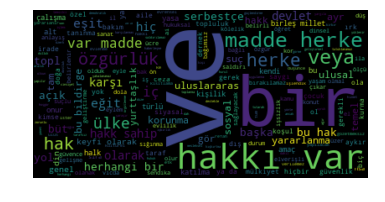

In [12]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(' '.join(kelimeler))    

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Başlıkta yazdığım gibi burada verdiklerim metin işlemenin sadece ilk adımları. Yapılacak daha çok şey var. Bu yazıda bile, örneğin, "ve, ama, falan" gibi işlevsel kelimeler ya da soru ifade eden ekler ile uğraşmadık. Aslına bakarsanız doğal dil işleme başlı başına bir çalışma alanı. Bu konuya zaten merak sarmış olanlar [NLTK](http://www.nltk.org/) paketini inceleyebilirler. Oldukça kapsamlıdır. Biz de ilk bulduğumuz fırsatta farklı metin işleme örneklerini **Veri Defteri** sayfalarına eklemek istiyoruz. Bakalım.

---

Her zamanki gibi bu yazıyı, kodları ve kullanılan veriyi [GitHub sayfamızda](https://github.com/sibirbil/VeriDefteri) bulabilirsiniz.